<a href="https://colab.research.google.com/gist/sgoggins/929fd51d42f6530e26682a9098a5ecb9/untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matplotlib

1.	Matplotlib Visualization:
 - 	The update_plot function refreshes the plot each time the array changes during partitioning.
 - 	Different colors are used to represent different states:
 - 	Red: Pivot element.
 - 	Blue: Unsorted elements.
 - 	Green: Sorted elements on the left side of the pivot.
 - 	Yellow: Sorted elements on the right side of the pivot.
2.	QuickSort Process:
 - 	The quick_sort function calls partition recursively to sort the array.
 - 	The partition function selects a pivot and rearranges elements smaller than the pivot to its left, and elements larger to its right.
3.	Visualization:
 - 	The visualize_quick_sort function initializes the process with random integers and animates the sorting process step by step.


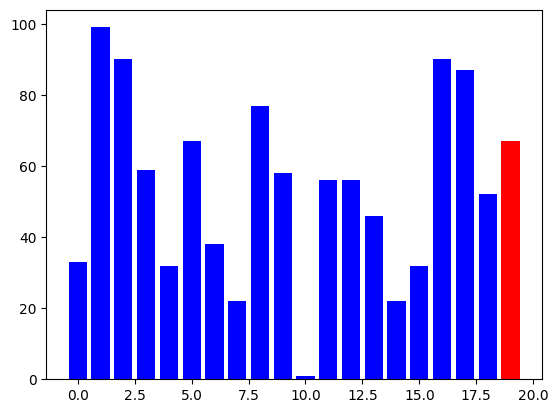

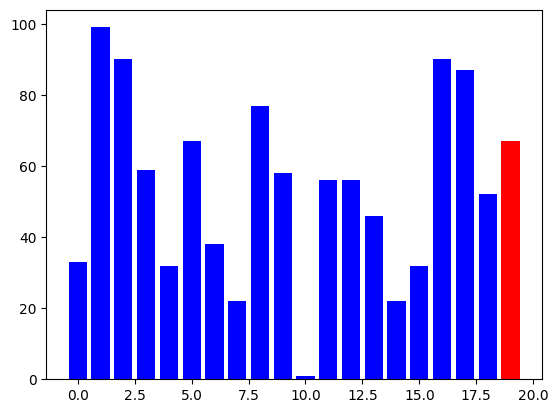

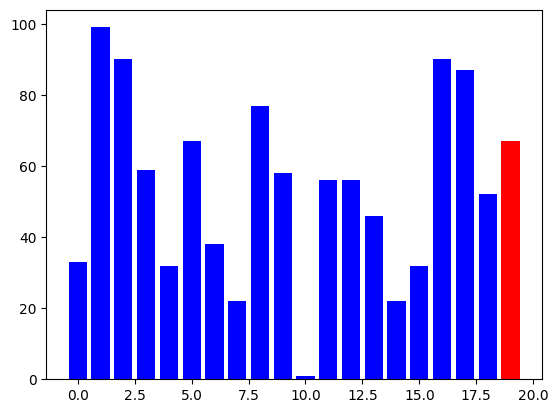

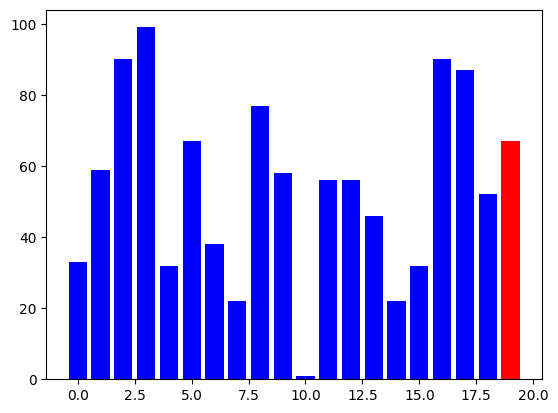

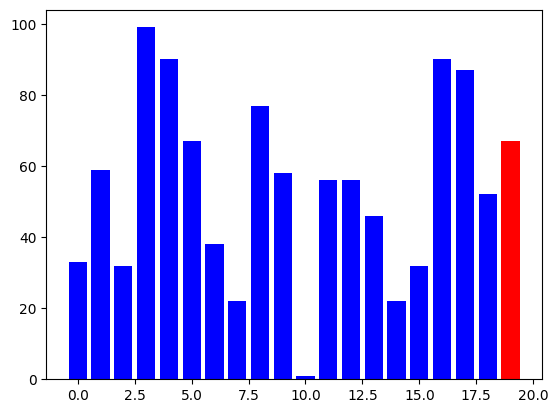

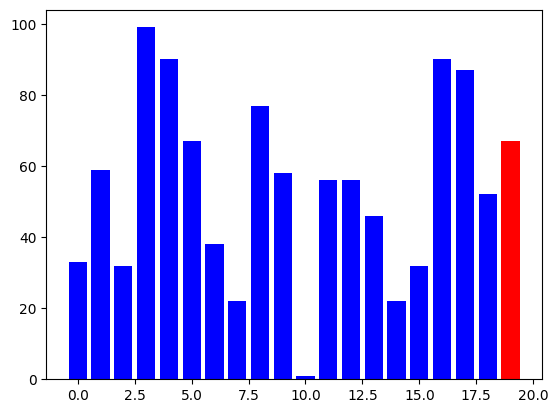

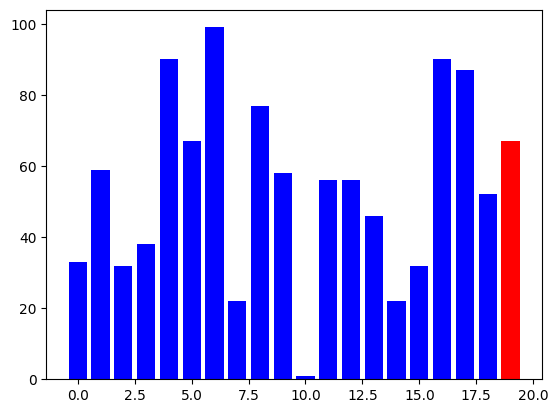

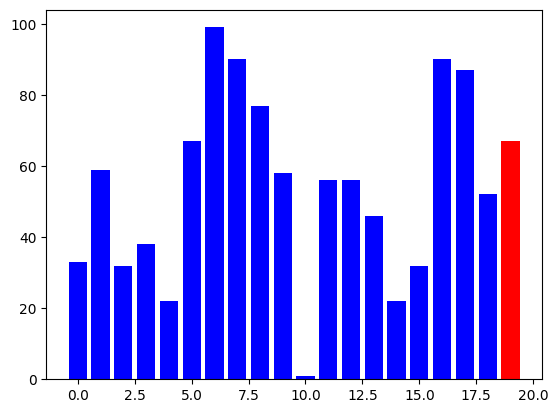

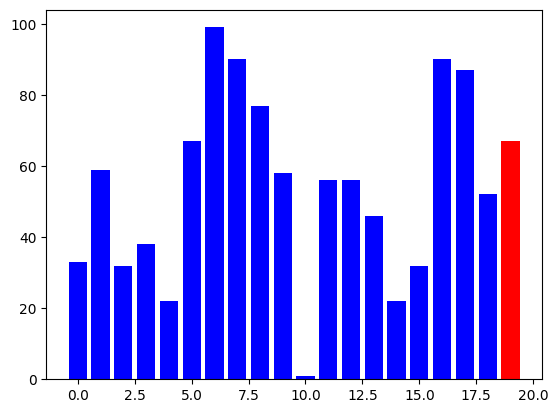

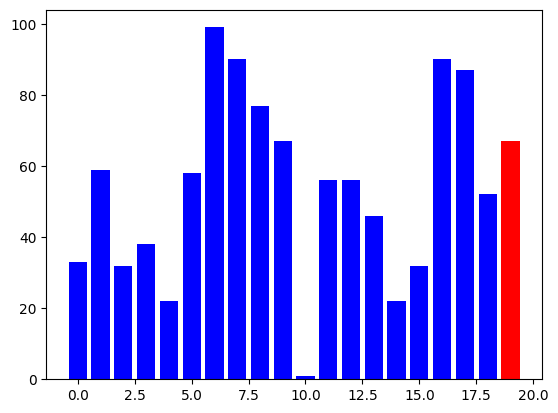

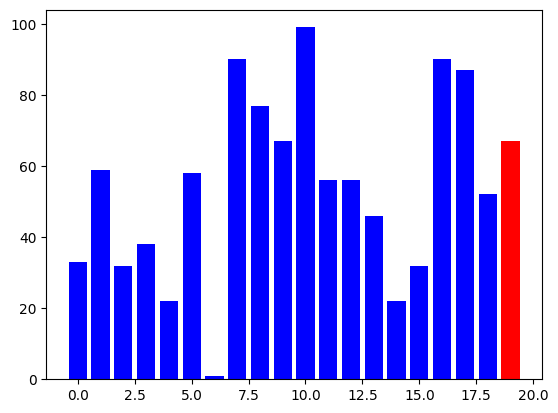

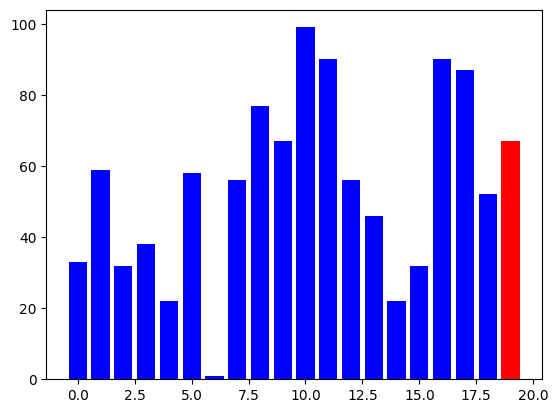

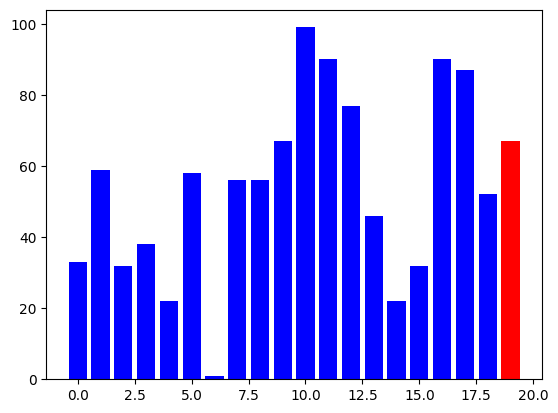

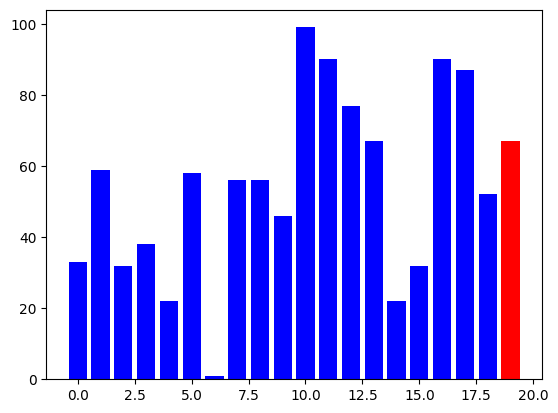

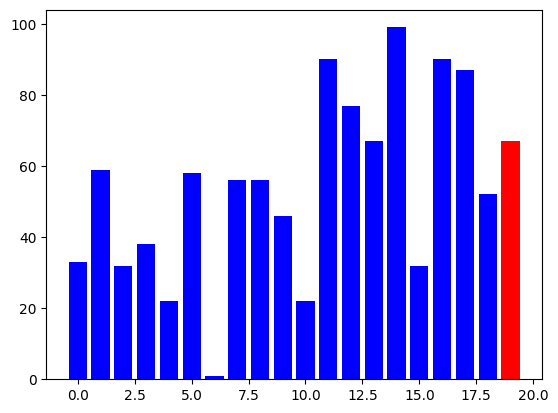

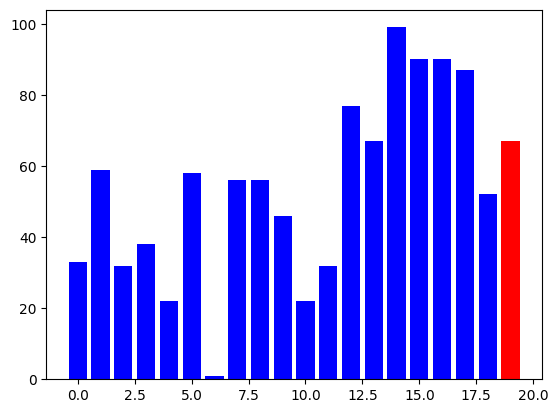

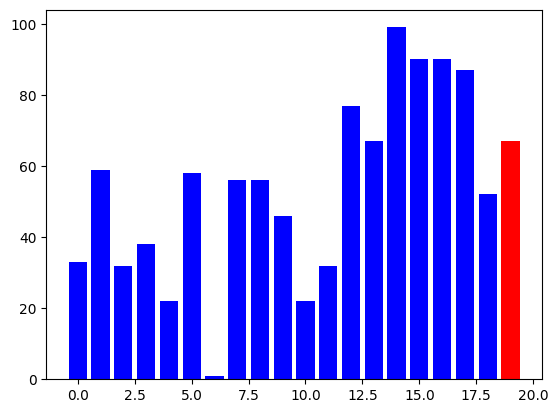

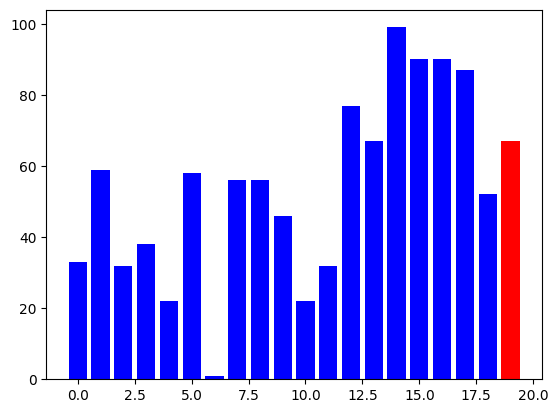

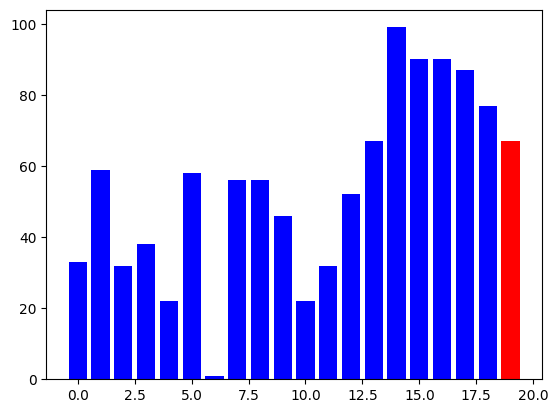

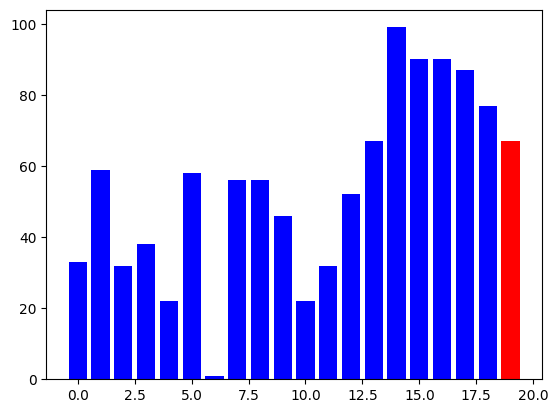

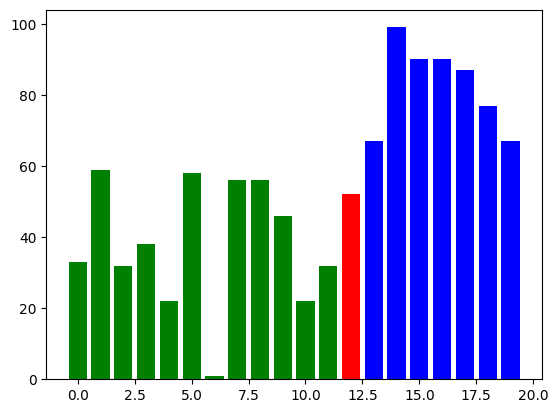

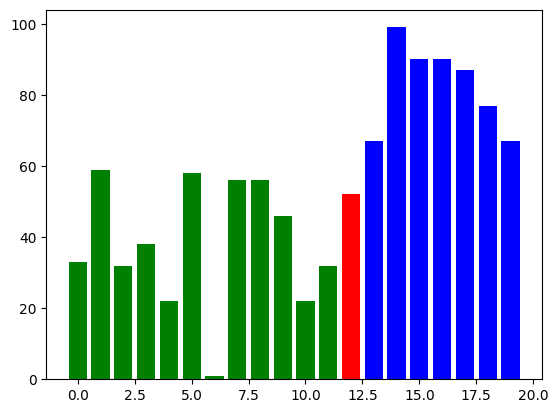

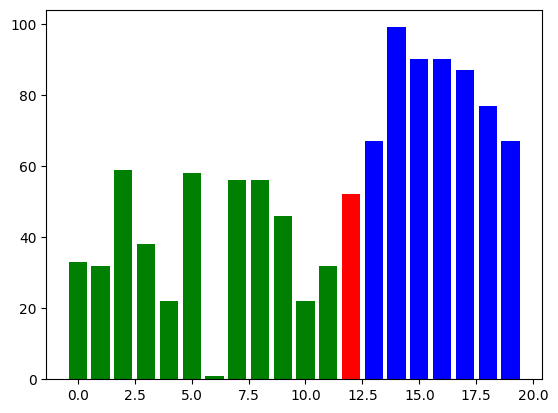

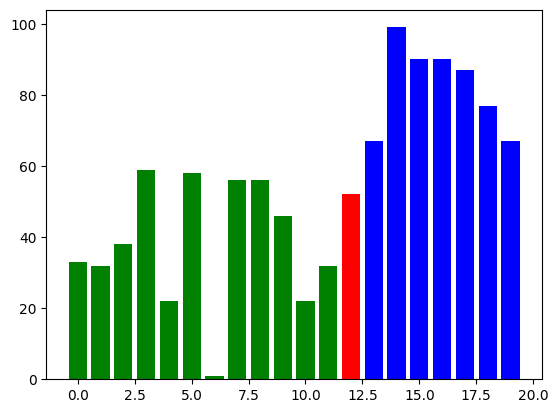

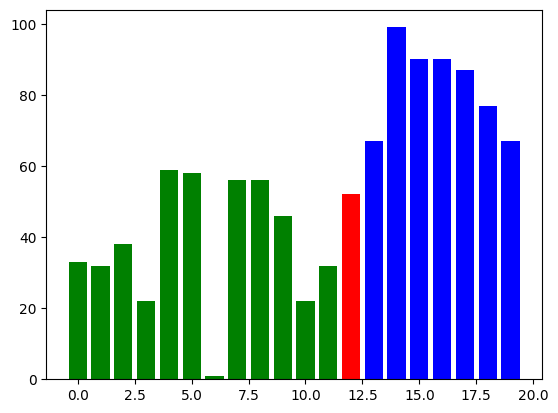

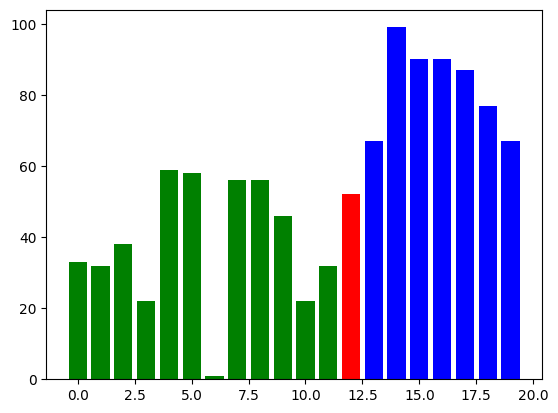

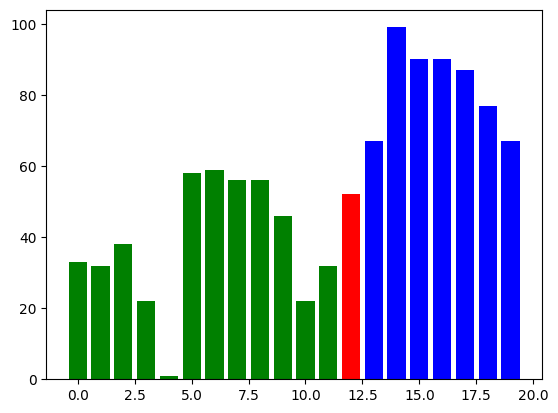

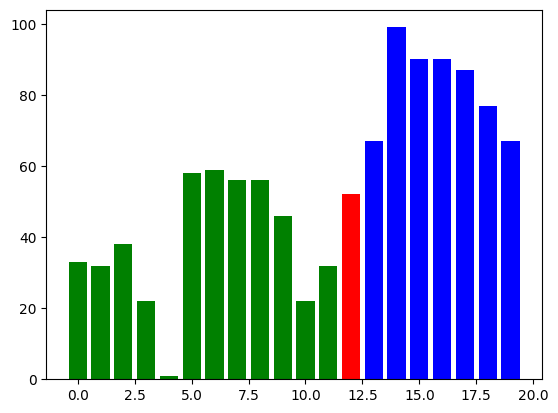

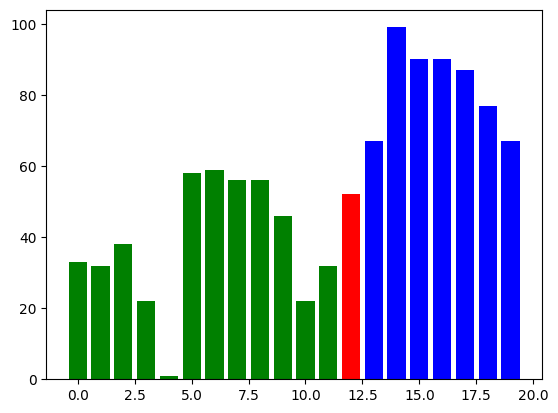

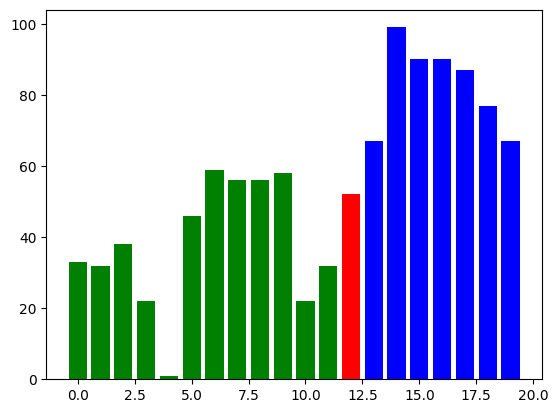

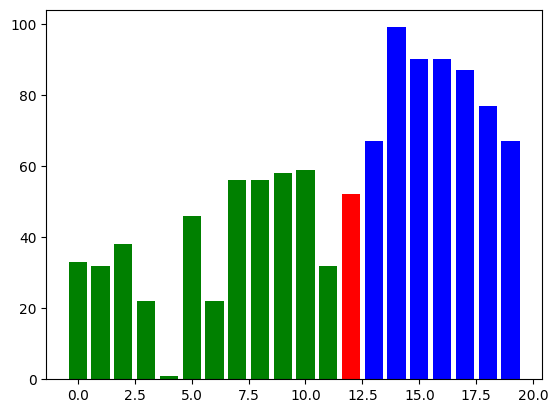

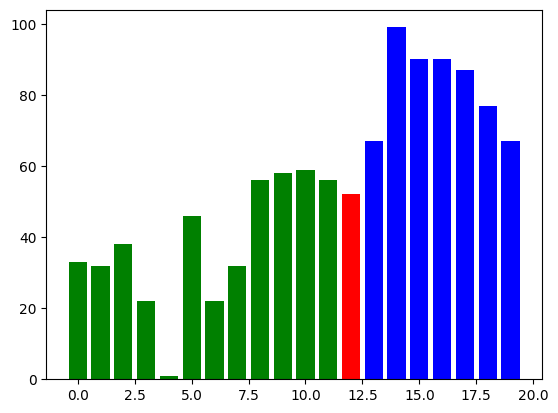

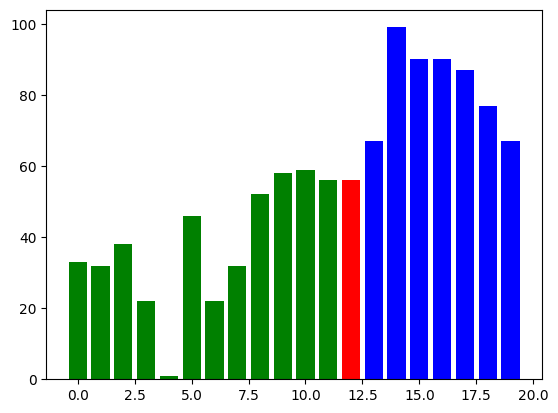

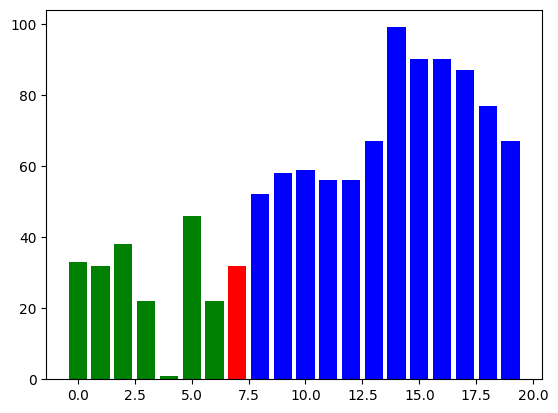

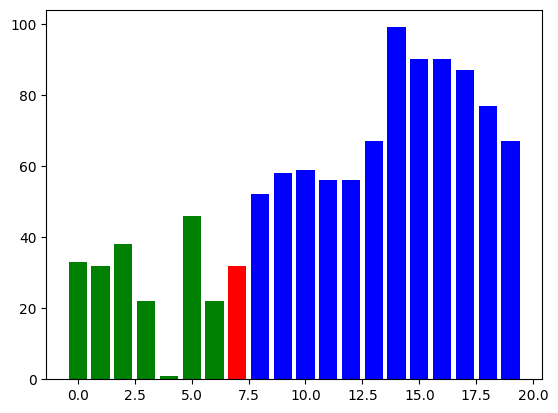

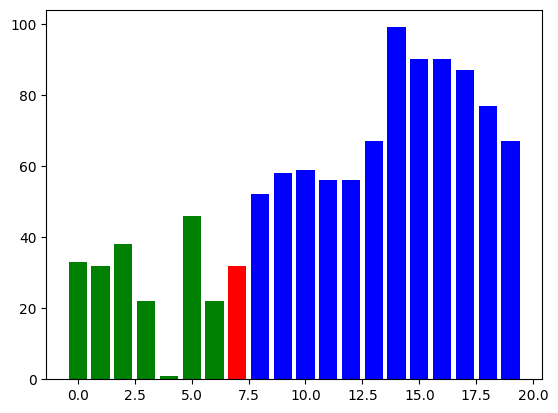

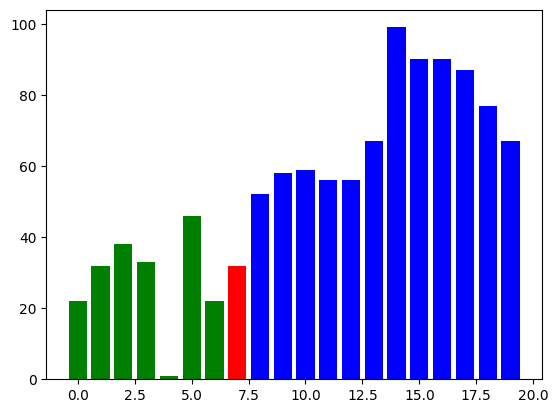

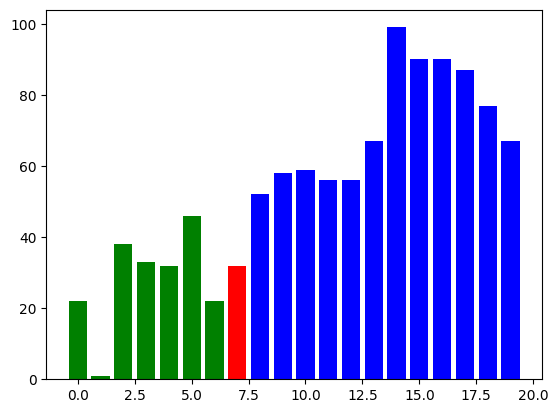

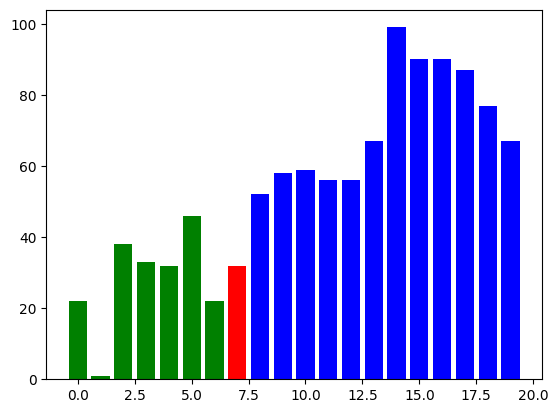

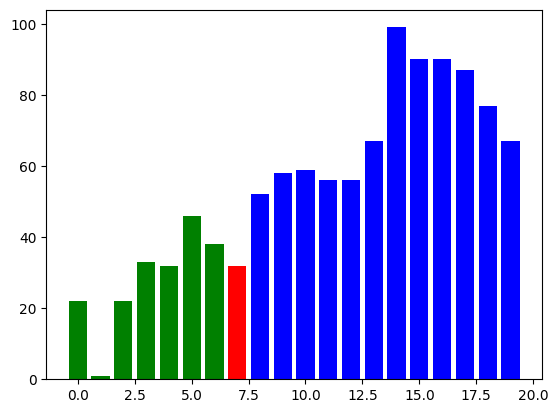

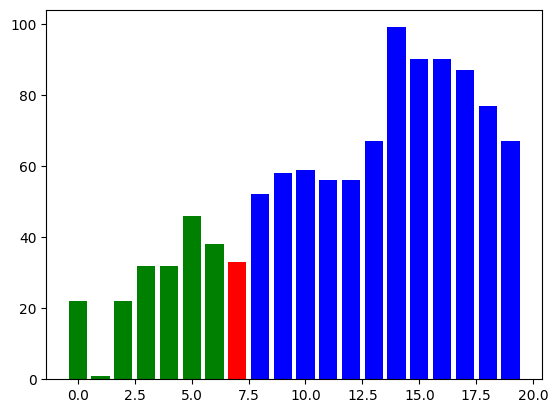

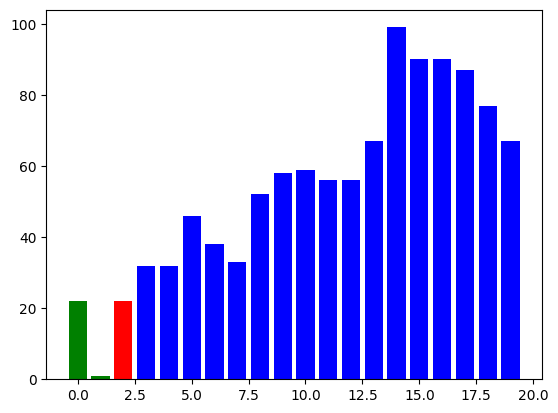

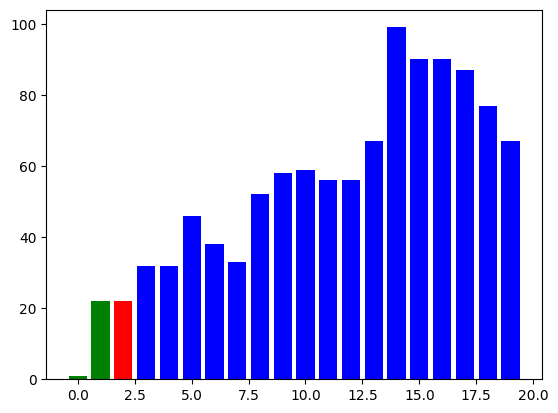

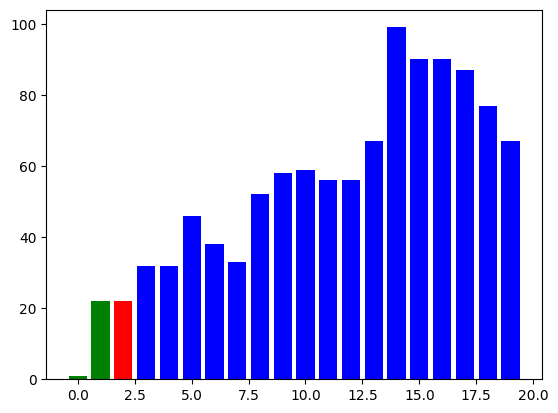

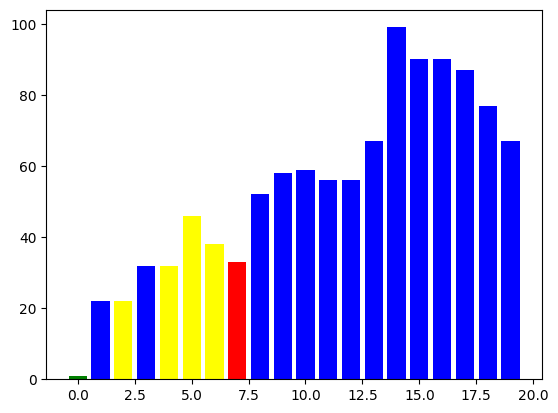

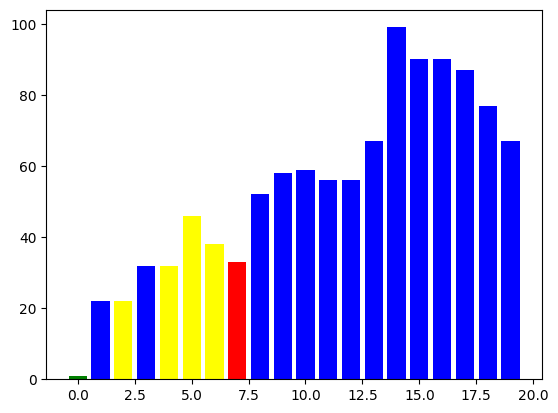

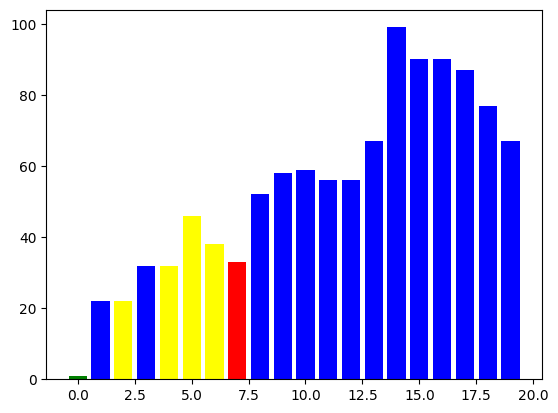

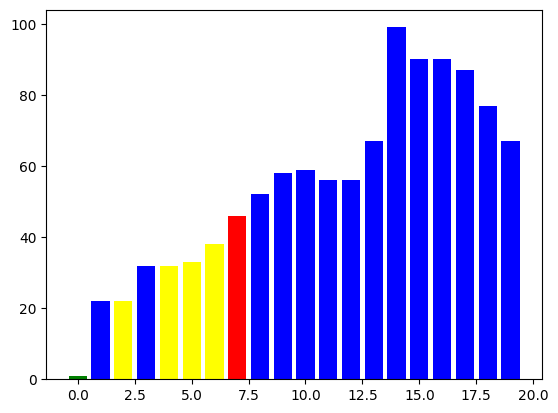

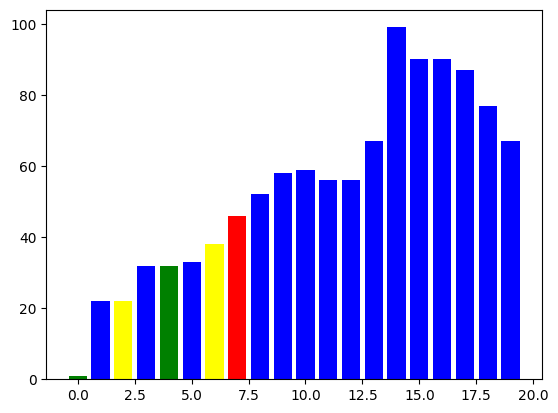

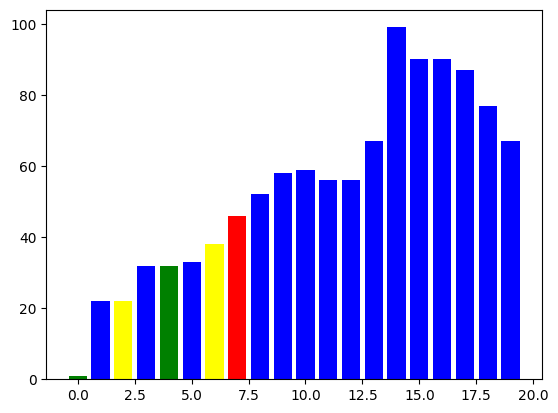

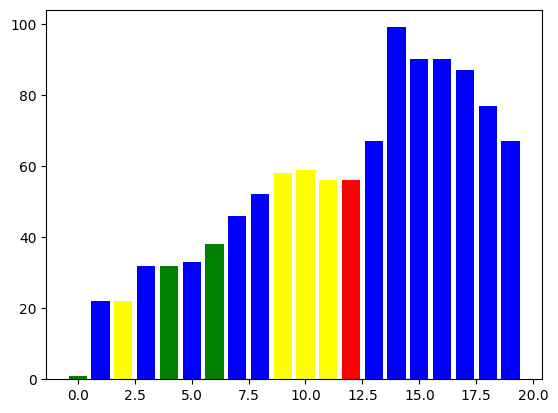

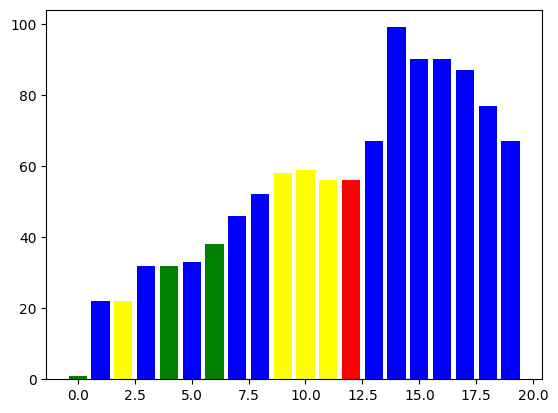

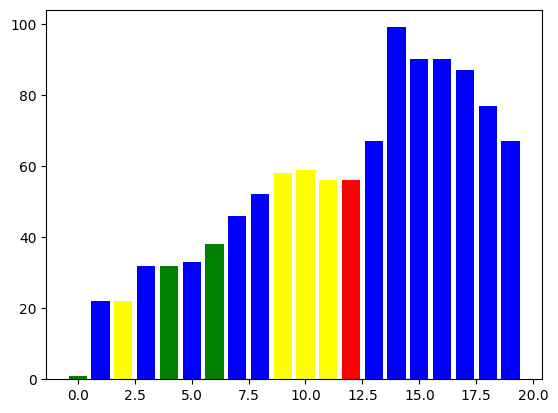

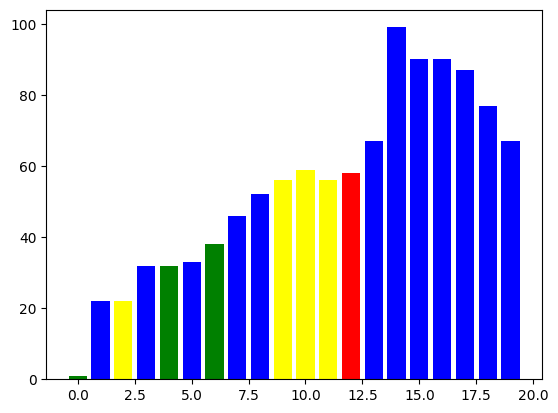

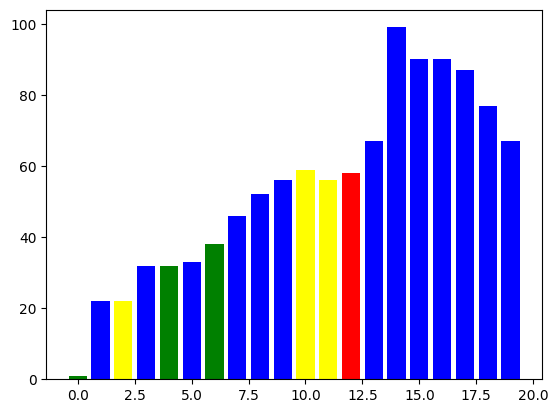

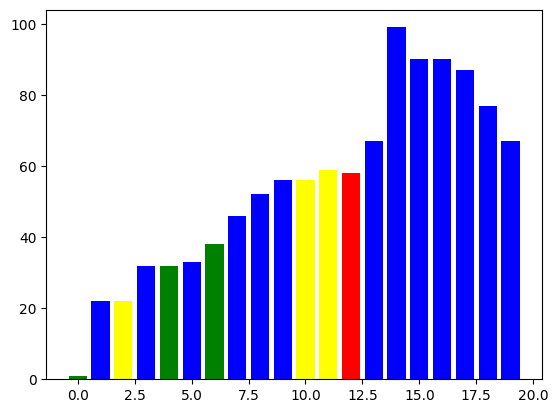

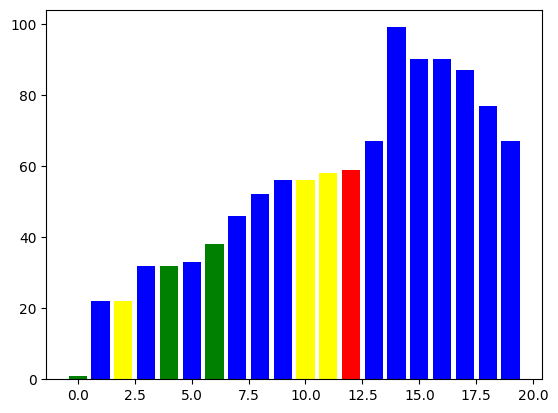

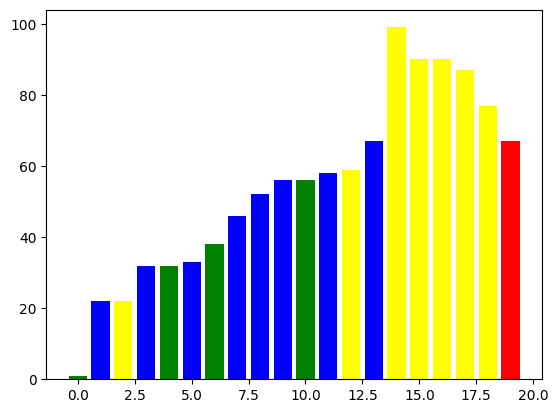

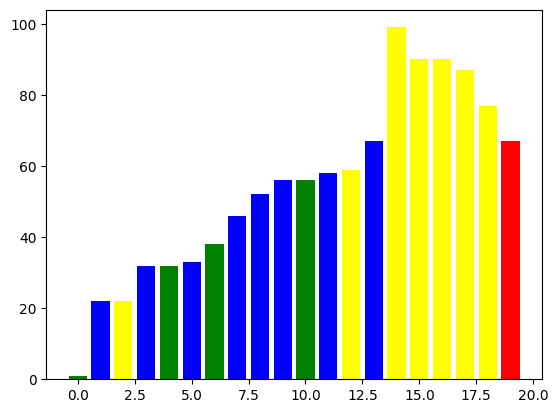

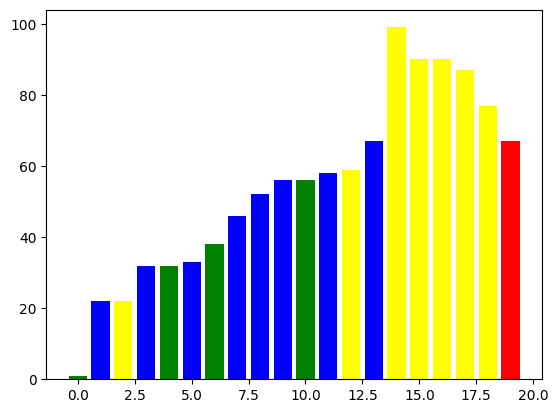

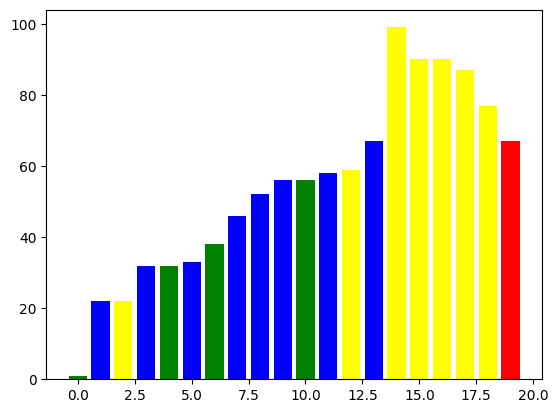

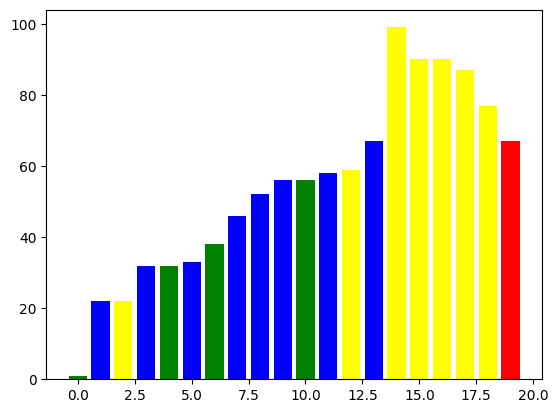

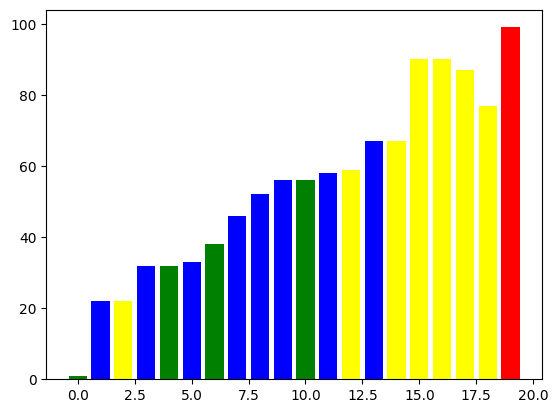

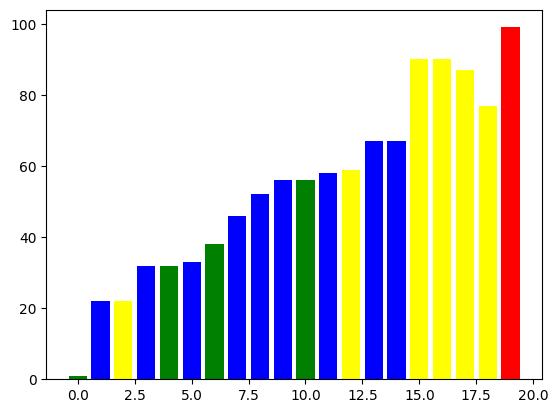

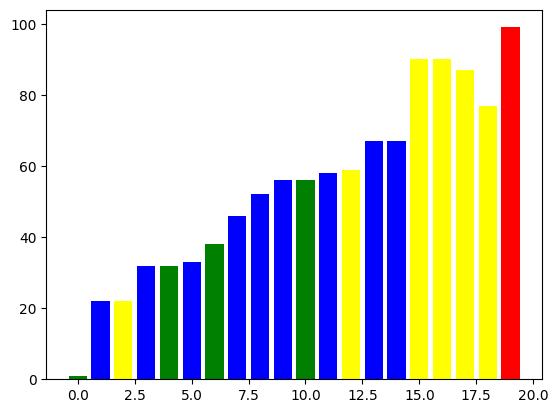

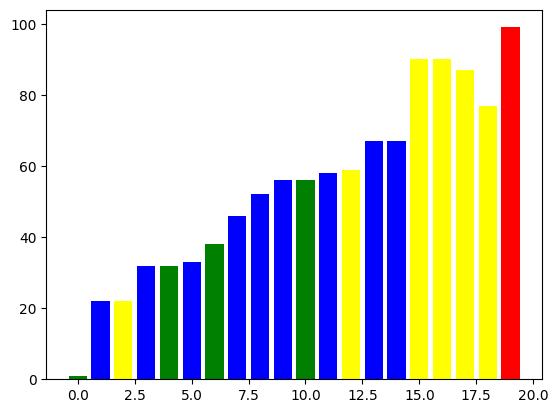

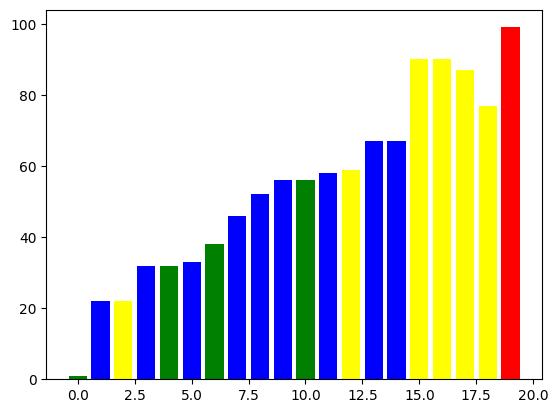

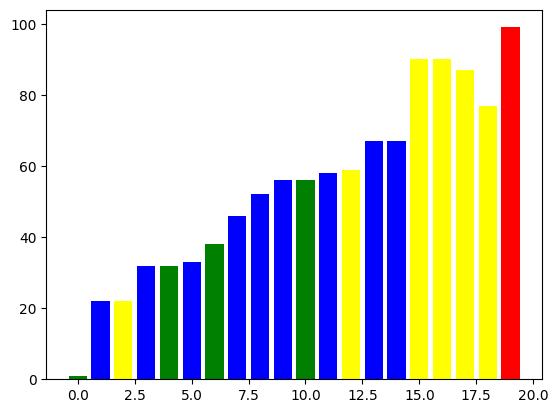

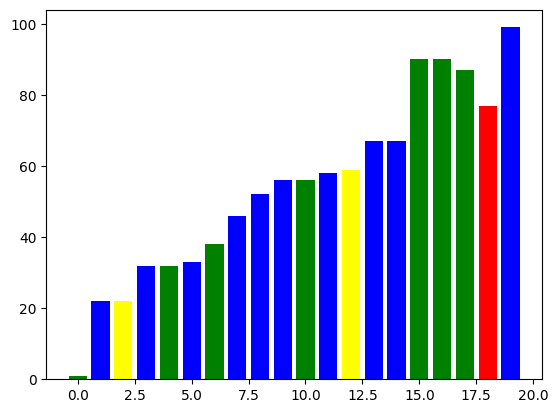

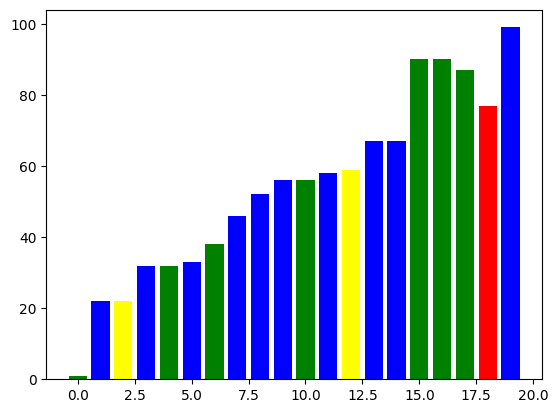

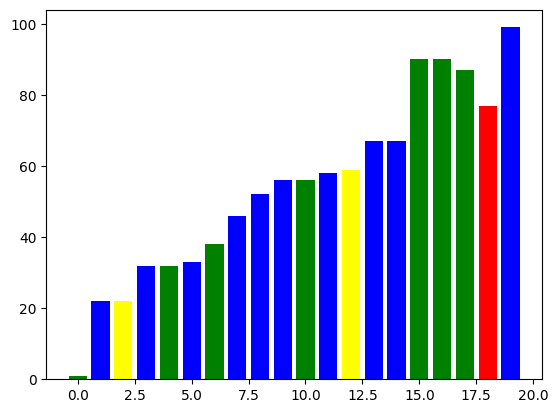

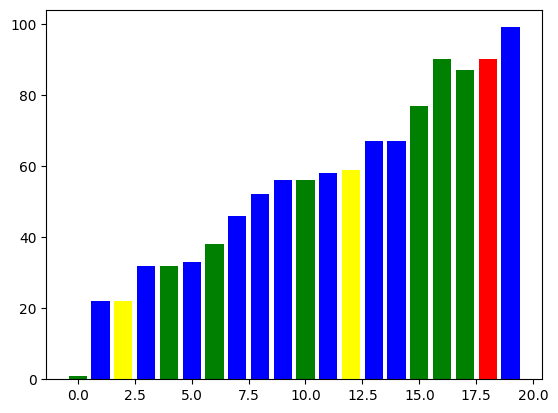

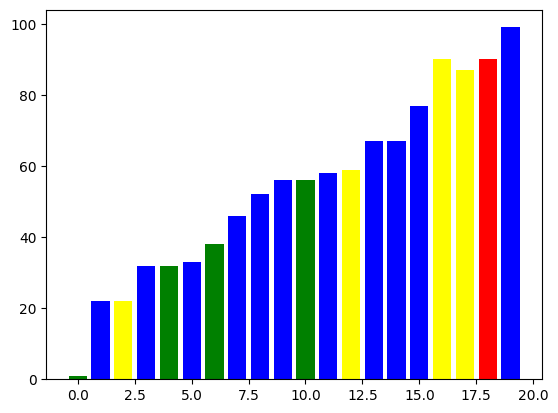

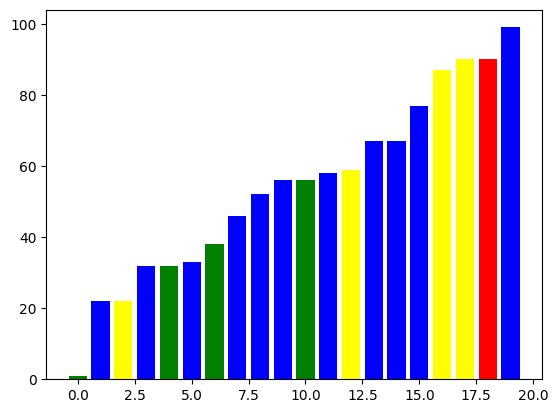

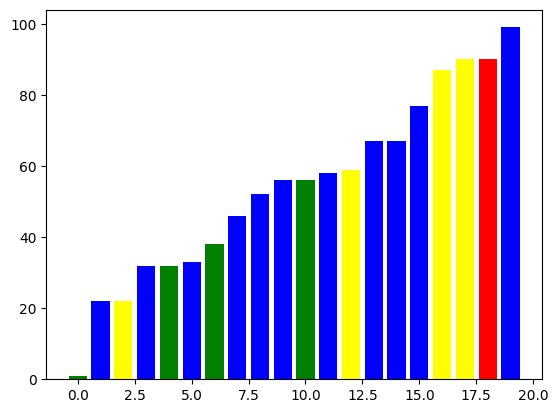

In [1]:


import matplotlib.pyplot as plt
import numpy as np
import time

# Function to update the plot
def update_plot(arr, color_map):
    plt.clf()
    plt.bar(range(len(arr)), arr, color=color_map)
    plt.pause(0.5)

# QuickSort partition function
def partition(arr, low, high, color_map):
    pivot = arr[high]
    i = low - 1
    color_map[high] = 'red'  # Highlight pivot in red

    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
        update_plot(arr, color_map)

    arr[i+1], arr[high] = arr[high], arr[i+1]
    update_plot(arr, color_map)

    # Reset color map
    color_map[low:high+1] = ['blue'] * (high - low + 1)
    return i + 1

# QuickSort function
def quick_sort(arr, low, high, color_map):
    if low < high:
        pi = partition(arr, low, high, color_map)

        # Recursive call for the left partition
        color_map[low:pi] = ['green'] * (pi - low)
        quick_sort(arr, low, pi-1, color_map)

        # Recursive call for the right partition
        color_map[pi+1:high+1] = ['yellow'] * (high - pi)
        quick_sort(arr, pi+1, high, color_map)

# Function to visualize QuickSort
def visualize_quick_sort(arr):
    plt.ion()
    color_map = ['blue'] * len(arr)  # Initial bar colors
    quick_sort(arr, 0, len(arr) - 1, color_map)
    plt.ioff()
    plt.show()

# Example array
arr = np.random.randint(1, 100, 20)

# Call the visualization function
visualize_quick_sort(arr)

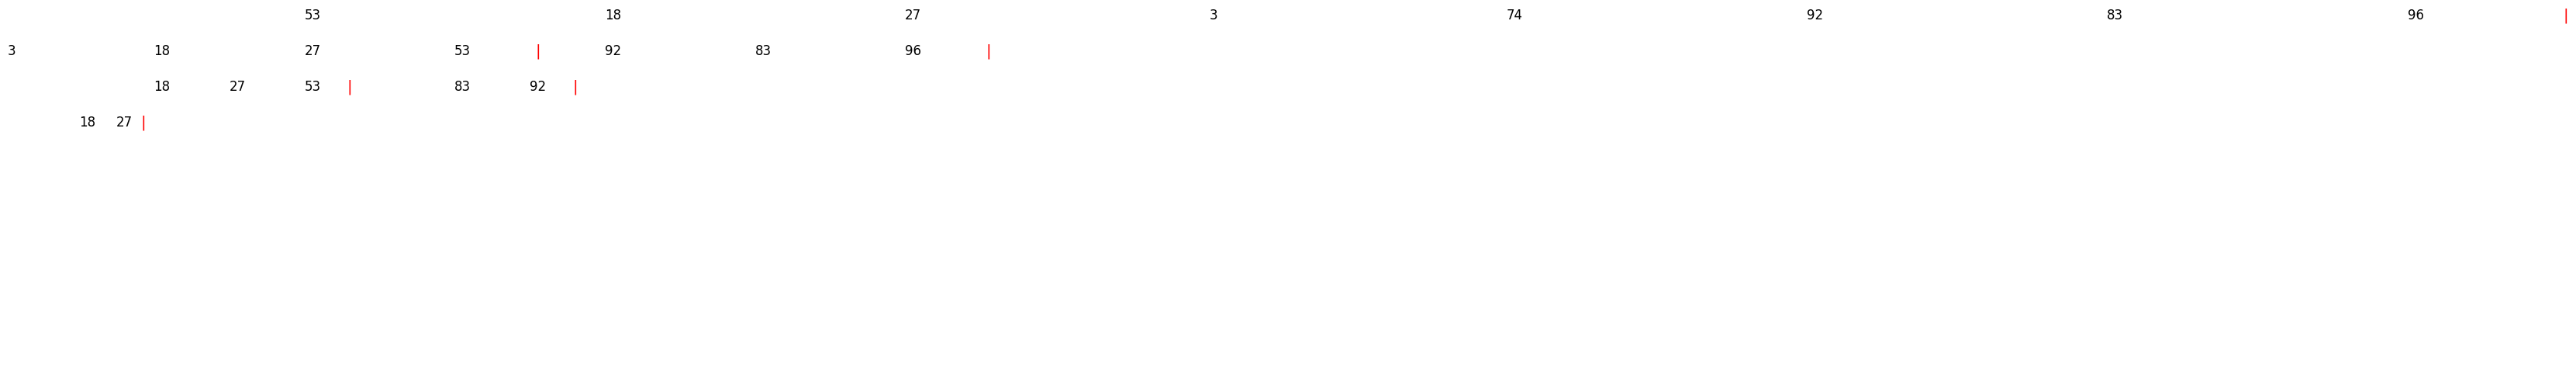

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize QuickSort in a tree-like structure
def quicksort_tree(arr, low, high, ax, x=0.5, y=1, dx=0.5, dy=0.1):
    if low < high:
        # Partition the array
        pi = partition(arr, low, high)

        # Plot the current state of the array
        plot_array(ax, arr, low, high, x, y, dx)

        # Recursively sort the left and right partitions
        quicksort_tree(arr, low, pi - 1, ax, x - dx, y - dy, dx / 2, dy)
        quicksort_tree(arr, pi + 1, high, ax, x + dx, y - dy, dx / 2, dy)

# Partition function for QuickSort
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

# Function to plot the current state of the array at a particular recursion step
def plot_array(ax, arr, low, high, x, y, dx):
    # Plot array elements as text
    for i in range(low, high + 1):
        ax.text(x + (i - low) * dx, y, str(arr[i]), ha='center', va='center', fontsize=12, color='black')
    ax.text(x + (high - low) * dx + dx / 2, y, '|', ha='center', va='center', fontsize=14, color='red')  # Pivot mark
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

# Function to initiate the QuickSort visualization
def visualize_quicksort(arr):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_axis_off()

    quicksort_tree(arr, 0, len(arr) - 1, ax)
    plt.show()

# Example array
arr = np.random.randint(1, 100, 8)

# Run the visualization
visualize_quicksort(arr)